z5527155

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#img_dir: image path, 
#thresh_lb: the lower bound of cv2.inRange, 
#thresh_ub, the upper bound of cv2.inRange, 
#size_thresh: remove the objects under this value
def segment(img_dir, thresh_lb, thresh_ub, size_thresh):
    img_gray = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)

    bin_mask = cv2.inRange(img_gray, thresh_lb, thresh_ub)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
    morpho_mask = cv2.morphologyEx(bin_mask, cv2.MORPH_CLOSE, kernel)

    height, width = morpho_mask.shape

    contours, _ = cv2.findContours(morpho_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    item_mask = np.zeros_like(morpho_mask)

    for contour in contours:
        border = False
        for point in contour:
            x, y = point[0]
            if x <= 5 or y <= 5 or x >= width - 5 or y >= height - 5:
                border = True
                break
        if not border and int(cv2.contourArea(contour)) > size_thresh:
            cv2.drawContours(item_mask, [contour], -1, 255, thickness=cv2.FILLED)

    numbers, _ = cv2.findContours(item_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f'This picture contains {len(numbers)} items')

    plt.imshow(item_mask, cmap="gray")
    plt.show()

Image 1

This picture contains 21 items


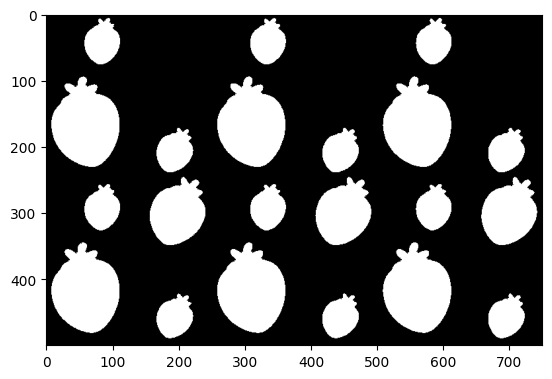

In [8]:
img1 = 'COMP9517_25T1_Lab4_Images\\Strawberries.jpg'
segment(img1, 100, 140, 800)

Image 2

This picture contains 72 items


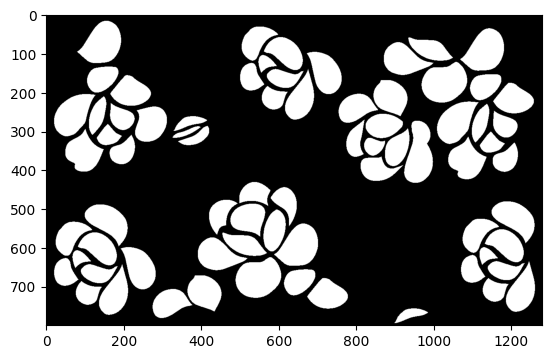

In [9]:
img2 = 'COMP9517_25T1_Lab4_Images\\Leaves.jpg'
segment(img2, 100, 140, 200)

Image 3

This picture contains 20 items


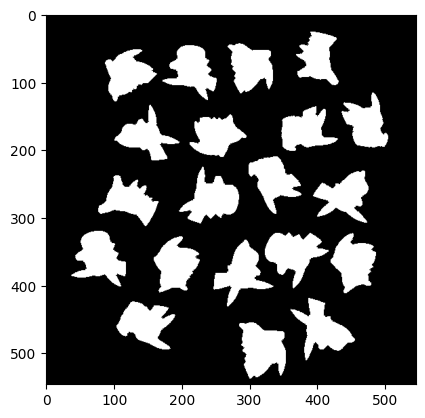

In [10]:
img3 = 'COMP9517_25T1_Lab4_Images\\Pikachus.jpg'
segment(img3, 100, 255, 800)